<img src="../Fink_PrimaryLogo_WEB.jpg" width=300 />

# Fink case study: multi-messenger/wavelength astronomy

## Goal

The goal of this notebook is to show how Fink can contribute to multi-messenger and multi-wavelength science. This notebook includes queries for science related to **Kilonovae** and **gamma ray bursts (GRBs) counterparts**. 

Real-time analysis for follow-up coordination will be better done through the Fink livestreams which processes and makes available the alert data within minutes of reception. Access through this notebook uses the API access which is not real-time based. We aggregate the data into our API and Science Portal database at the end of each observing night. API access can be useful to analyze last night and older alerts. For example in case of reprocessing analysis in the search for low signal-to-noise events in gravitational wave or other wavelength detectors.

## What is behind?

This notebook will use:
- **Fink cross-match** with close by sources in the [SIMBAD (Wenger et al. 2020)](https://aas.aanda.org/articles/aas/abs/2000/07/ds1821/ds1821.html) catalogue (within 1'') using [xmatch service](http://cdsxmatch.u-strasbg.fr) provided by the Centre de Données astronomiques de Strasbourg (CDS) .
- **Fink's machine learning (ML) classification** scores trained with [(Muthukrishna et al. 2019)](https://arxiv.org/abs/1904.00014) and [(Stachie et al. 2019)](https://arxiv.org/abs/1912.06383):
    - Random Forest to classify Kilonovae (Biswas et al. in prep)
    - [SuperNNova](https://github.com/supernnova/SuperNNova) [(Möller & de Boissière 2019)](https://academic.oup.com/mnras/article-abstract/491/3/4277/5651173) to classify SNe at all light-curve epochs
    - Random Forest (Leoni et al. in prep) and [(Ishida et al. 2019b)](https://ui.adsabs.harvard.edu/abs/2019MNRAS.483....2I/abstract) to classify early (pre-max) SN candidates
- **Fink's extra features** such as color `g-r` and `rate` when possible.

## Environment set up

To run this notebook, you need to import the following libraries (already installed in colab):

In [1]:
import requests
import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

# 1st case study: selecting kilonovae candidates

### <font color='blue'>API query:</font> <font color='orange'> latest alerts</font> of kilonovae candidates
**Kilonovae candidates is a tag defined and provided by Fink.** It requires that the alert has no known transient association (from catalogues), it is relatively new (number of previous detections < 20) and when our ML algorithm trained to select early kilonovae have a probability higher than 50% of this object being a kilonova.

In [2]:
# Get latests 20 alerts associated to Kilonova eventa
r = requests.post(
  'https://fink-portal.org/api/v1/latests',
  json={
    'class': 'Kilonova candidate',
    'n': '20',
    'color': 'True',
    'startdate': '2021-07-01', # use a start date
    'stopdate': '2021-08-31', # use a stop date
  }
)

# Format output in a DataFrame
pdf = pd.read_json(io.BytesIO(r.content))

See https://fink-portal.org/api/v1/latests to check all the available arguments. 

This table contains all alerts linked to a kilonova candidate. This includes:
- Alert information from ZTF processing (just latest photometry points).
- Fink's added values.

The table schema is described at https://fink-portal.org/api/v1/columns.

In [3]:
pdf

,d:cdsxmatch,d:mulens,d:rf_kn_vs_nonkn,d:rf_snia_vs_nonia,d:roid,d:snn_sn_vs_all,d:snn_snia_vs_nonia,i:candid,i:chipsf,i:classtar,...,v:g-r,v:rate(g-r),v:dg,v:rate(dg),v:dr,v:rate(dr),v:lastdate,v:firstdate,v:lapse,v:constellation
0,Unknown,0,0.533333,0.046,0,2.250162e-01,0.751085,1701264402515015016,35.762848,0.984,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-29 06:20:44.998,2021-08-27 05:24:36.996,2.038982,Cygnus
1,Unknown,0,0.800000,0.046,0,4.987537e-01,0.639816,1700262180915015000,2.312526,0.981,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-28 06:17:33.000,2021-08-26 05:15:37.999,2.042998,Lyra
2,Unknown,0,0.700000,0.046,0,6.237140e-02,0.581569,1699169580115015022,1.372685,0.848,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-27 04:04:11.997,2021-08-15 04:01:28.001,12.001898,Ophiucus
3,Fail,0,0.866667,0.046,0,5.533628e-01,0.632198,1698290422815015008,1.379076,0.976,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-26 06:58:12.996,2021-08-24 05:53:55.003,2.044653,Hercules
4,Unknown,0,0.933333,0.046,0,4.306669e-01,0.649029,1688236906315015008,5.759946,0.995,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-16 05:41:08.998,2021-08-12 05:19:04.996,4.015324,Aquila
5,Unknown,0,0.533333,0.046,0,3.129871e-01,0.671792,1687190310115015021,37.634087,0.985,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-15 04:34:03.000,2021-08-09 05:02:21.002,5.980347,Aquila
6,Unknown,0,0.600000,0.046,0,1.132084e-01,0.411644,1685384500515015003,22.272335,0.985,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-13 09:13:40.999,2021-08-08 08:40:56.997,5.022732,Cassiopeia
7,Unknown,0,0.600000,0.046,0,2.990206e-01,0.611848,1675369302315015029,38.887318,0.992,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-03 08:51:48.004,2021-08-01 07:26:52.002,2.058982,Cygnus
8,Unknown,0,0.600000,0.046,0,3.219889e-02,0.747270,1675245821815015010,4.289250,0.983,...,NaN,NaN,0.000000,0.000000,0.000000,0.000000,2021-08-03 05:53:59.004,2021-07-30 06:15:42.002,3.984919,Draco
9,Unknown,0,0.633333,0.046,0,2.344505e-02,0.597906,1673328923215015010,4.231155,0.983,...,NaN,NaN,0.000000,0.000000,0.110264,226.833468,2021-08-01 07:53:38.999,2021-07-27 08:57:51.998,4.955405,Cygnus


### <font color='blue'>Analysing the output:</font>   <font color='orange'>scores</font>  of these alerts

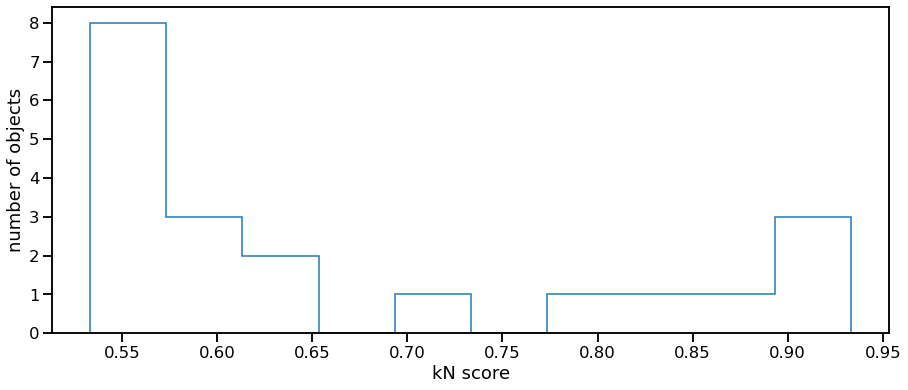

In [4]:
fig = plt.figure(figsize=(15, 6))

plt.hist(pdf['d:rf_kn_vs_nonkn'],histtype='step')
plt.ylabel('number of objects')
plt.xlabel('kN score')
plt.show()

An interesting question to ask is wether there are some of these events that may be also high-probability candidate SNe.

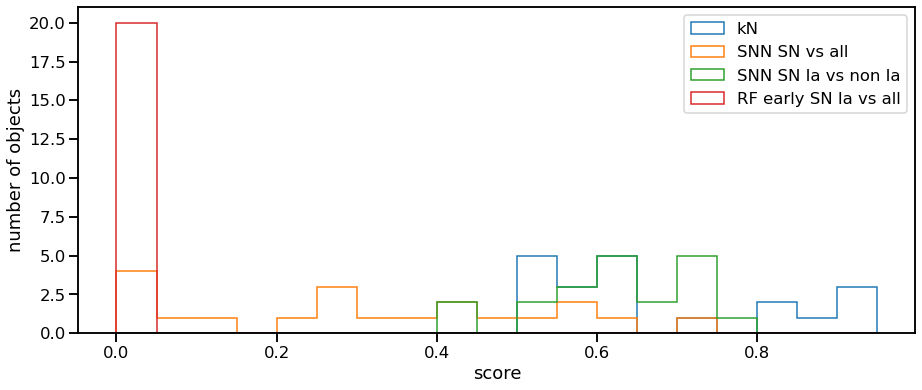

In [5]:
fig = plt.figure(figsize=(15, 6))

bins = np.arange(0,1,0.05)

plt.hist(pdf['d:rf_kn_vs_nonkn'],histtype='step',label='kN',bins=bins)
plt.hist(pdf['d:snn_sn_vs_all'],histtype='step',label='SNN SN vs all',bins=bins)
plt.hist(pdf['d:snn_snia_vs_nonia'],histtype='step',label='SNN SN Ia vs non Ia',bins=bins)
plt.hist(pdf['d:rf_snia_vs_nonia'],histtype='step',label='RF early SN Ia vs all',bins=bins)

plt.legend()
plt.xlabel('score')
plt.ylabel('number of objects')
plt.show()

Most the kilonova candidates are not tagged as early SNe Ia but can be tagged as possible SNe.

How many individual objects have been tagged as possible kN?

In [6]:
pdf['i:objectId'].unique()

array(['ZTF21abvrrir', 'ZTF21abvevwh', 'ZTF21abtpedp', 'ZTF21abuysnl',
       'ZTF21absmlzd', 'ZTF21abrshzu', 'ZTF21abrlwud', 'ZTF21abqfzcp',
       'ZTF21abppezh', 'ZTF21aboulpc', 'ZTF21abotose', 'ZTF21abmoupj',
       'ZTF21ablssud', 'ZTF21abkjvko', 'ZTF21abitmou'], dtype=object)

### <font color='blue'>API query:</font> <font color='orange'> photometry </font> of a kilonova candidate

In [7]:
# identify the first object in the list of potential KN
cond = pdf['i:objectId'] == 'ZTF21abvrrir'
single_object_name = pdf[cond]['i:objectId'].values[0]

In [8]:
single_object_name

'ZTF21abvrrir'

In [9]:
# get all alert information related to this object
r = requests.post(
   'https://fink-portal.org/api/v1/objects',
   json={
     'objectId': single_object_name,
     'withupperlim': 'True',
   }
 )

# Format output in a DataFrame
single_object = pd.read_json(io.BytesIO(r.content))

This query can include upper limits and bad quality data associated to this object using the argument `withupperlim`.
See https://fink-portal.org/api/v1/objects to get the list of available arguments.


### <font color='blue'>Plot</font>   one light-curve for visualization

See the example on https://fink-portal.org/api to plot full lightcurve with layout template. We implement here an useful function for plotting light-curves in this notebook.

In [10]:
def plot_lc(pdf):
    """ Plot photometry contains in an alert
    
    Parameters
    ----------
    pdf: pandas DataFrame
        Pandas DataFrame with single alert row
    """
    fig = plt.figure(figsize=(15, 6))

    # Colors to plot
    colordic = {1: 'C0', 2: 'C1'}

    # Labels of ZTF filters
    filtdic = {1: 'g', 2: 'r'}

    for filt in np.unique(pdf['i:fid']):
        # select data from one filter at a time
        maskFilt = pdf['i:fid'] == filt

        # The column `d:tag` is used to check data type
        maskValid = pdf['d:tag'] == 'valid'
        plt.errorbar(
            pdf[maskValid & maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf[maskValid & maskFilt]['i:magpsf'],
            pdf[maskValid & maskFilt]['i:sigmapsf'],
            ls = '', marker='o', color=colordic[filt], label=filtdic[filt]
        )

        maskUpper = pdf['d:tag'] == 'upperlim'
        plt.plot(
            pdf[maskUpper & maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf[maskUpper & maskFilt]['i:diffmaglim'],
            ls='', marker='v', color=colordic[filt], markerfacecolor='none'
        )

        maskBadquality = pdf['d:tag'] == 'badquality'
        plt.errorbar(
            pdf[maskBadquality & maskFilt]['i:jd'].apply(lambda x: x - 2400000.5),
            pdf[maskBadquality & maskFilt]['i:magpsf'],
            pdf[maskBadquality & maskFilt]['i:sigmapsf'],
            ls='', marker='^', color=colordic[filt]
        )

    plt.gca().invert_yaxis()
    plt.legend()
    plt.title(pdf['i:objectId'][0])
    plt.xlabel('Modified Julian Date')
    plt.ylabel('Magnitude')
    plt.show()

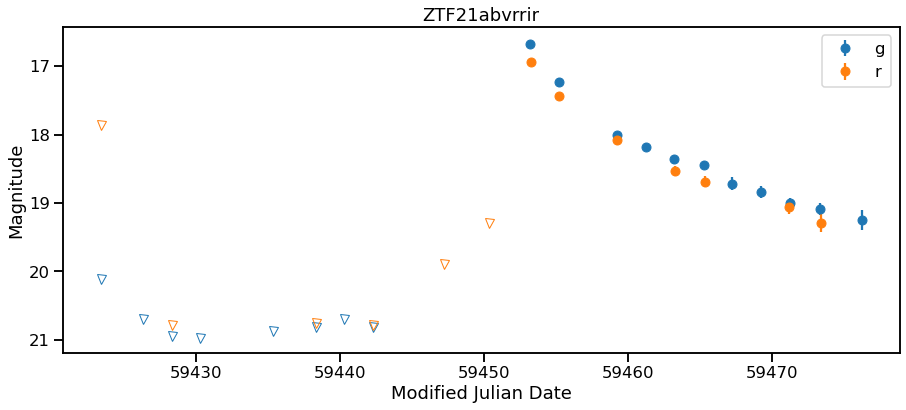

In [11]:
plot_lc(single_object)

In this plot:
- Circles (●) with error bars show valid alerts that pass the Fink quality cuts.
- Upper triangles with errors (▲), represent alert measurements that do not satisfy Fink quality cuts, but are nevetheless contained in the history of valid alerts and used by classifiers.
- Lower triangles (▽), represent 5-sigma mag limit in difference image based on PSF-fit photometry contained in the history of valid alerts.

### <font color='blue'>Analyse</font>   <font color='orange'>color or rate</font>  of these alerts (if there are g and r measurements in the same night)
Color `v:g-r` is an added value provided by Fink. It is computed as the subtraction of the `magpsf` in the `g` filter minus its corresponding `magpsf` in the `r` filter for an object in a given night. If no same-night different filter measurements are available, the value of color is `NaN`.
Rate g: magnitude increase rate per day for the g band. Same for r filter.

In [12]:
# print
pdf[["v:rate(dr)","v:rate(dg)","v:g-r"]]

,v:rate(dr),v:rate(dg),v:g-r
0,0.000000,0.000000,NaN
1,0.000000,0.000000,NaN
2,0.000000,0.000000,NaN
3,0.000000,0.000000,NaN
4,0.000000,0.000000,NaN
5,0.000000,0.000000,NaN
6,0.000000,0.000000,NaN
7,0.000000,0.000000,NaN
8,0.000000,0.000000,NaN
9,226.833468,0.000000,NaN


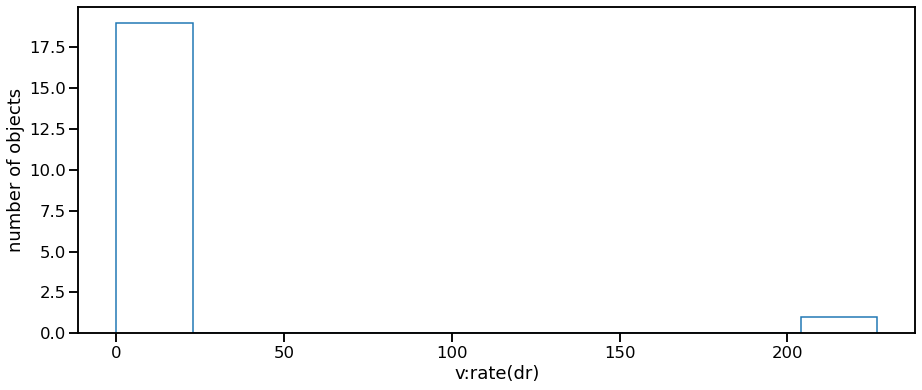

In [13]:
#plot
var  = "v:rate(dr)" #"v:g-r"
fig = plt.figure(figsize=(15, 6))
plt.hist(pdf[var], histtype='step')
plt.xlabel(var)
plt.ylabel('number of objects')
# plt.yticks(range(3), range(3))
plt.show()

# 2nd case study: transients within an area of the sky

Your MMA survey may have a low S/N event that was not communicated through VOEvents. You may want to see if there was a transient within an area of the sky. 

### <font color='blue'>API query:</font> <font color='orange'> objects</font> within a conesearch

The API allows a conesearch around a position on the sky given by (RA, Dec, radius). The initializer for RA/Dec is very flexible and supports inputs provided in a number of convenient formats. Radius is specified in arcsecond.

More information on parameters of query: https://fink-portal.org/api/v1/explorer

In [14]:
# Get all objects falling within (center, radius) = ((ra, dec), radius)
r = requests.post(
  'https://fink-portal.org/api/v1/explorer',
  json={
    'ra': '261.723',
    'dec': '13.178',
    'radius': '10', # radius in arcsec
  }
)

# Format output in a DataFrame
pdf_cone = pd.read_json(io.BytesIO(r.content))

In [15]:
pdf_cone

,b:cutoutDifference_stampData,b:cutoutScience_stampData,b:cutoutTemplate_stampData,d:cdsxmatch,d:mulens,d:nalerthist,d:rf_kn_vs_nonkn,d:rf_snia_vs_nonia,d:roid,d:snn_sn_vs_all,...,i:ypos,i:zpclrcov,i:zpmed,d:tracklet,v:classification,v:lastdate,v:firstdate,v:lapse,v:constellation,v:separation_degree
0,binary:ZTF21aassamj_2459382.8514352:cutoutDiff...,binary:ZTF21aassamj_2459382.8514352:cutoutScie...,binary:ZTF21aassamj_2459382.8514352:cutoutTemp...,Unknown,0,18,0,0,0,0.40151,...,1393.059,-0.000003,26.276,,Unknown,2021-06-17 08:26:04.001,2021-04-03 11:06:14.999,74.888762,Ophiucus,0.00104


This table contains all alerts linked to the conesearch candidate. This includes:
- Alert information from ZTF processing (just latest photometry points).
- Fink's added values.

The table schema is described at https://fink-portal.org/api/v1/columns.

# 3rd case study: transients within a time window

Your MMA survey may have detected a transient that could have an optical counterpart in ZTF. This can be useful for offline searches of GRB, FRBs and others counterparts!

### <font color='blue'>API query:</font>   <font color='orange'>objects </font>  within a time window

The API allows a search within a time window (maximum 180 minutes) of all alerts.

More information on parameters of query: https://fink-portal.org/api/v1/explorer

In [16]:
# Get all objects within observed at "stardate" within an interval of "window"
r = requests.post(
  'https://fink-portal.org/api/v1/explorer',
  json={
    'startdate': '2021-02-05 09:39:34.998',
    'window': 1            # Time window in minutes. Maximum is 180 minutes
  }
)

# Format output in a DataFrame
pdf_time_window = pd.read_json(io.BytesIO(r.content))

In [17]:
pdf_time_window

,d:cdsxmatch,d:mulens,d:rf_kn_vs_nonkn,d:rf_snia_vs_nonia,d:roid,d:snn_sn_vs_all,d:snn_snia_vs_nonia,i:candid,i:chipsf,i:classtar,...,i:ssnamenr,i:tooflag,i:xpos,i:ypos,d:tracklet,v:classification,v:lastdate,v:firstdate,v:lapse,v:constellation
0,Candidate_CV*,0,0.0,0.0,0,0.0,0.0,1496403022515010000,2.865403,0.693,...,null,0,1400.1873,646.1431,,Candidate_CV*,2021-02-05 09:40:20.997,2017-11-21 12:49:01.004,1171.868981,Coma Berenices
1,Unknown,0,0.0,0.0,0,0.0,0.0,1496403021615010000,2.511065,0.716,...,null,0,2021.0880,1007.2287,,Unknown,2021-02-05 09:40:20.997,2018-05-31 04:29:50.997,981.215625,Coma Berenices
2,Seyfert_1,0,0.0,0.0,0,0.0,0.0,1496403025415010000,1.097149,0.964,...,null,0,1181.4911,770.3105,,Seyfert_1,2021-02-05 09:40:20.997,2018-07-06 04:42:13.000,945.207037,Coma Berenices
3,QSO,0,0.0,0.0,0,0.0,0.0,1496403022315010002,0.958059,0.783,...,null,0,2843.2644,2842.9336,,QSO,2021-02-05 09:40:20.997,2019-12-29 13:06:30.004,403.856840,Coma Berenices
4,BLLac,0,0.0,0.0,0,0.0,0.0,1496403022515015010,1.206433,0.804,...,null,0,390.2816,1998.6206,,BLLac,2021-02-05 09:40:20.997,2019-02-26 08:34:19.004,710.045856,Coma Berenices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,RRLyr,0,0.0,0.0,0,0.0,0.0,1496402485015015006,11.471780,0.996,...,null,0,1133.7010,274.6772,,RRLyr,2021-02-05 09:39:34.998,2018-01-13 10:53:36.001,1118.948600,Canes Venatici
412,QSO,0,0.0,0.0,0,0.0,0.0,1496402483315015003,1.692615,0.789,...,null,0,447.5457,938.9416,,QSO,2021-02-05 09:39:34.998,2018-12-13 12:10:42.004,784.895058,Canes Venatici
413,QSO,0,0.0,0.0,0,0.0,0.0,1496402482715010001,1.205319,0.894,...,null,0,773.9974,996.8939,,QSO,2021-02-05 09:39:34.998,2019-10-29 12:56:24.996,464.863310,Canes Venatici
414,QSO,0,0.0,0.0,0,0.0,0.0,1496402483715015006,1.528782,0.982,...,null,0,2334.9320,2984.3088,,QSO,2021-02-05 09:39:34.998,2018-12-17 12:08:34.002,780.896539,Canes Venatici


### <font color='blue'>Analysing the output:</font>  restricting to  an area in the sky

In [18]:
# additional constraint on position over objects suviving the time search
cond1 = pdf_time_window['i:ra'] > 198
cond2 = pdf_time_window['i:ra'] < 199
cond3 = pdf_time_window['i:dec'] > 35
cond4 = pdf_time_window['i:dec'] < 38

pdf_time_window_area = pdf_time_window[cond1 & cond2 & cond3 & cond4]

In [19]:
pdf_time_window_area

,d:cdsxmatch,d:mulens,d:rf_kn_vs_nonkn,d:rf_snia_vs_nonia,d:roid,d:snn_sn_vs_all,d:snn_snia_vs_nonia,i:candid,i:chipsf,i:classtar,...,i:ssnamenr,i:tooflag,i:xpos,i:ypos,d:tracklet,v:classification,v:lastdate,v:firstdate,v:lapse,v:constellation
243,RRLyr,0,0.0,0.0,0,0.0,0.0,1496402485015010003,1.683570,0.655,...,null,0,2931.7214,1120.4117,,RRLyr,2021-02-05 09:39:34.998,2018-01-13 12:36:25.998,1118.877188,Canes Venatici
303,Unknown,0,0.0,0.0,3,0.0,0.0,1496402485515015009,3.911325,0.983,...,33908,0,601.0590,2609.8280,,Solar System MPC,2021-02-05 09:39:34.998,2021-02-05 09:39:34.998,0.000000,Canes Venatici
318,RRLyr,0,0.0,0.0,0,0.0,0.0,1496402485015010004,3.121901,0.986,...,null,0,2805.4985,2691.7540,,RRLyr,2021-02-05 09:39:34.998,2018-02-24 10:21:56.998,1076.970579,Canes Venatici
328,QSO,0,0.0,0.0,0,0.0,0.0,1496402485015015018,1.119494,0.908,...,null,0,2000.4971,1703.7133,,QSO,2021-02-05 09:39:34.998,2018-12-09 13:09:53.001,788.853958,Canes Venatici
364,Seyfert_1,0,0.0,0.0,0,0.0,0.0,1496402485215015014,9.474269,0.997,...,null,0,227.5690,1712.9660,,Seyfert_1,2021-02-05 09:39:34.998,2018-02-25 11:55:53.000,1075.905347,Canes Venatici


Inspecting the classification by Fink `v:classification` we see that one of the objects may be an asteroid as determined by Fink's filters. 

The probable optical event associated to your MMA is the one corresponding to `Seyfert_1`:

In [20]:
MMAobjname = pdf_time_window_area.loc[364]['i:objectId']
print(MMAobjname)


ZTF20aaccwtk


### <font color='blue'>API query:</font>  fetch thumbnails for this object

In [21]:
# transfer cutout data
r = requests.post(
  'https://fink-portal.org/api/v1/objects',
  json={
    'objectId': MMAobjname,
    'withcutouts': 'True'
  }
)

# Format output in a DataFrame
pdf = pd.read_json(io.BytesIO(r.content))

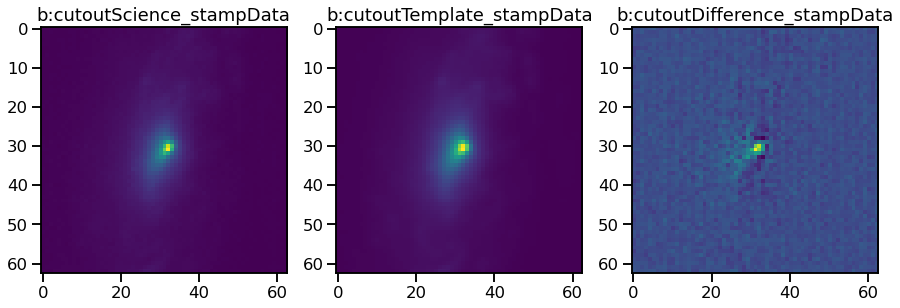

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

columns = [
    'b:cutoutScience_stampData',
    'b:cutoutTemplate_stampData',
    'b:cutoutDifference_stampData'
]
for index, col in enumerate(columns):
    # 2D array
    data = pdf[col].values[0]

    # do whatever plotting
    axes[index].imshow(data)
    axes[index].set_title(col)
plt.show()

Alternatively for displaying images, you can use our cutout service (see https://fink-portal.org/api/v1/cutouts for the list of available arguments):

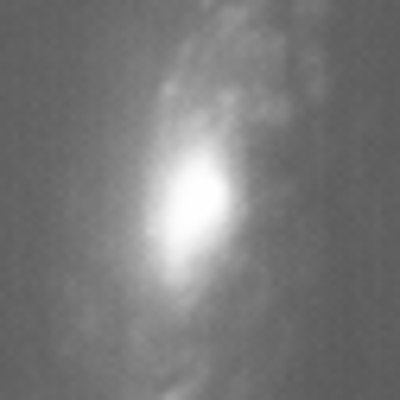

In [23]:
import io
from PIL import Image as im

# get processed image data
r = requests.post(
    'https://fink-portal.org/api/v1/cutouts',
    json={
        'objectId': MMAobjname,
        'kind': 'Science', # Science, Template, Difference
    }
)

image = im.open(io.BytesIO(r.content))
image.resize((400, 400))

# Summary
In this notebook we have searched for possible MMA optical counterparts:
- Querying Fink's API for latest alerts using our science filters.
- Querying Fink's API for latest alerts using a conesearch.
- Querying Fink's API for latest alerts using a time-window.
- Querying Fink's API for photometry and thumbnails for a given object.

The API servive is not a real-time database. For real time services please use the live-stream. However, the API is useful for offline searches and analysis!

### An issue to report, or a question to ask: contact@fink-broker.org !